### Задание со звездочкой №1
**Представьте, что вы аналитик в сервисе такси. Ваша задача – написать функцию haversine для подсчета расстояния между пунктами отправления и прибытия и, используя  pd.iterrows(), создать колонку distance с подсчитанным расстоянием.**
 **Более подробно ознакомиться с формулой расчета расстояния по координатам можно по ссылке:**
 **https://congyuzhou.medium.com/%D1%80%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5-%D0%BC%D0%B5%D0%B6%D0%B4%D1%83-%D0%B4%D0%B2%D1%83%D0%BC%D1%8F-%D1%82%D0%BE%D1%87%D0%BA%D0%B0%D0%BC%D0%B8-%D0%BD%D0%B0-%D0%BF%D0%BE%D0%B2%D0%B5%D1%80%D1%85%D0%BD%D0%BE%D1%81%D1%82%D0%B8-%D0%B7%D0%B5%D0%BC%D0%BB%D0%B8-a398352bfbde**
 
  **Функция haversine() должна принимать на вход 5 параметров, один из которых должен иметь значение по умолчанию (radius=6371).**
   **Датасет, с которым мы будем работать – данные о поездках в Нью-Йорке.**
 

In [30]:
# Загружаем необходимые библиотеки
import numpy as np
import pandas as pd
from math import sqrt, sin, cos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Открываем .csv файл, заархивированный в .zip
df = pd.read_csv('nyc.csv.zip',compression='zip')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                50000 non-null  object 
 1   fare_amount        50000 non-null  float64
 2   pickup_datetime    50000 non-null  object 
 3   pickup_longitude   50000 non-null  float64
 4   pickup_latitude    50000 non-null  float64
 5   dropoff_longitude  50000 non-null  float64
 6   dropoff_latitude   50000 non-null  float64
 7   passenger_count    50000 non-null  int64  
 8   distance           50000 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 3.4+ MB


In [3]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,2012-11-06 07:09:00.00000069,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [4]:
# Функция по расчету расстояния между точками с известными координатами (требуется numpy)
#Latitude - широта
#Longitude - долгота

def haversine(longitude1, latitude1, longitude2, latitude2,radius=6371):
    longitude1, latitude1, longitude2, latitude2 = map(np.radians, [longitude1, latitude1, longitude2, latitude2])
    diff_lon = longitude2 - longitude1
    diff_lat = latitude2 - latitude1
    
    a = np.sin(diff_lat/2.0)**2 + np.cos(latitude1) * np.cos(latitude2) * np.sin(diff_lon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    d = radius * c
    
    return d

In [5]:
# Сверка полученных функцией значей возможна на веб-сайте 
# https://www.movable-type.co.uk/scripts/latlong.html?from=48.619,-120.412&to=48.59617,-120.4020

haversine(-74.016048, 40.711303, -73.979268, 40.782004)

8.450133595805992

In [6]:
%%time 
#Замер времени исполнения ячейки

#Способ №1

dists = [ ]
for i, row in df.iterrows():
    dists.append(haversine(row['pickup_longitude'], 
                           row['pickup_latitude'], 
                           row['dropoff_longitude'], 
                           row['dropoff_latitude']))
df['distance'] = dists # type(dists) = list

CPU times: total: 4.7 s
Wall time: 4.72 s


In [7]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [8]:
%%time 
#Замер времени исполнения ячейки

#Способ №2

df['distance'] = pd.Series(haversine(row['pickup_longitude'], 
                                     row['pickup_latitude'], 
                                     row['dropoff_longitude'], 
                                     row['dropoff_latitude']) for i, row in df.iterrows())

CPU times: total: 4.75 s
Wall time: 4.76 s


In [9]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


**На первый взгляд, pd.iterrows() хорошо справляется со своей задачей и выполнение операции не занимает много времени.**

**Давайте попробуем еще один метод, pd.itertuples, который на каждой итерации возвращает именованный кортеж (named tuple) для каждой строки датафрейма. Параметр index по умолчанию равен True, поэтому первым элементом кортежа следует индекс, далее — содержимое строки.**

**Задача: проделайте ту же операцию, что и в предыдущем шаге, но уже используя pd.itertuples(), а затем сравните время выполнения.**

In [10]:
%%time 

#Замер времени исполнения ячейки

#Способ №1

df['distance'] = pd.Series(haversine(row.pickup_longitude, 
                                     row.pickup_latitude, 
                                     row.dropoff_longitude, 
                                     row.dropoff_latitude) for row in df.itertuples())

CPU times: total: 1.05 s
Wall time: 1.06 s


In [11]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [12]:
%%timeit 
#Замер времени исполнения ячейки

#Способ №2

dists = [ ]
for row in df.itertuples():
    dists.append(haversine(row[4], 
                           row[5], 
                           row[6], 
                           row[7],))
df['distance'] = dists # type(dists) = list

1.08 s ± 29.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


**Еще один часто используемый метод pd.apply() применяет заданную функцию вдоль определенной оси (axis=0 – строки; axis=1 – столбцы), и является более эффективным способом, чем pd.iterrows() за счет использования внутренних оптимизаций в pandas. Тем не менее, все равно подразумевает итерацию по всем рядам.**

**В столбец distance датафрейма сохраните результат подсчета расстояния между точками отправки и прибытия, используя заданную функцию. В переменную longest сохраните самое большое расстояние.**

In [16]:
%%timeit

df['distance'] = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].apply(lambda row: haversine(row[0], row[1], row[2], row[3]), axis=1)

2.03 s ± 106 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [18]:
%%timeit

df['distance'] = df.apply(lambda x: haversine(x['pickup_longitude'], x['pickup_latitude'], x['dropoff_longitude'], x['dropoff_latitude']), axis=1)

2.41 s ± 61.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
df.head()

In [21]:
longest = df['distance'].max()
longest

8667.818812217454

**В целом, itertuples — это именно то, что нам нужно! Но есть пара моментов.**

**Оказывается, в нашем случае itertuples — не предел. На всех предыдущих шагах мы использовали циклы, что не очень хорошо. Почему же?**

**Базовые объекты в pandas — Series и DataFrame, которые представляют собой одномерные и двумерные массивы (arrays) соответственно. Так, векторизация — процесс выполнения операций над массивами. В pandas есть довольно большой набор векторизованных функций, и их использование во многих случаях предпочтительнее обычных циклов, поскольку они предназначены для работы именно с Series. К таким функциям относятся, например, sum и agg. С помощью векторизации можно получить ещё большее ускорение, значительно уменьшив количество итераций. Иными словами, действия будут происходят сразу над всей серией, а не над каждым элементом по отдельности.**

**Изменения в коде весьма незначительны: передаем функции на вход необходимые колонки, и получается магия!**

In [23]:
%%timeit

df['distance'] = haversine(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])

7.65 ms ± 368 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**В предыдущем шаге мы передавали функции колонки формата Series, с чем связаны дополнительные вычислительные затраты, например, индексирование и проверка типа данных. Чтобы этого избежать, в качестве аргументов функции можно передать всё те же необходимые колонки, дополнительно указав .values, чтобы из Series получить массив NumPy (numpy array). В таком случае действия будут выполняться непосредственно над ndarrays. Такой способ можно использовать, когда отсутствие индексов и пр. не приведет к нарушению работы применяемой функции.** 

In [24]:
%%timeit

df['distance'] = haversine(df['pickup_longitude'].values, df['pickup_latitude'].values, df['dropoff_longitude'].values, df['dropoff_latitude'].values)

5.25 ms ± 144 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**Давайте подробнее посмотрим на информацию о самой длинной поездке в датасете.**

 - key                  2012-05-12 10:48:00.00000020
 - fare_amount                                  49.8
 - pickup_datetime         2012-05-12 10:48:00+00:00
 - pickup_longitude                         -74.0149
 - pickup_latitude                           40.7134
 - dropoff_longitude                               0
 - dropoff_latitude                                0
 - passenger_count                                 1
 - distance                                  8667.82
 - Name: 48996, dtype: object


**Как вы уже заметили, произошло что-то странное: в качестве широты и долготы стоят нулевые значения, а расстояние — целых 8667 км! Неужели наш пассажир действительно уехал так далеко?**

**Посмотрите, есть ли еще кейсы, где в качестве хотя бы одной из координат пункта назначения стоят нули, и в качестве ответа укажите количество таких случаев.**

In [29]:
df.query('dropoff_longitude == 0 or dropoff_latitude == 0').shape

(958, 9)

**Предположим, наша цель всё ещё состоит в поиске самых дальних поездок. Естественно, текущие данные совсем не годятся — некоторые такси, согласно данным, уезжают и приезжают из океана.**

**Постройте графики распределения переменных pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude, и для каждой переменной выберите только один наиболее подходящий вариант для дальнейшей фильтрации данных**

In [41]:
# Настройка графиков по умолчанию
sns.set(
    font_scale =1.5,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,10)}
)

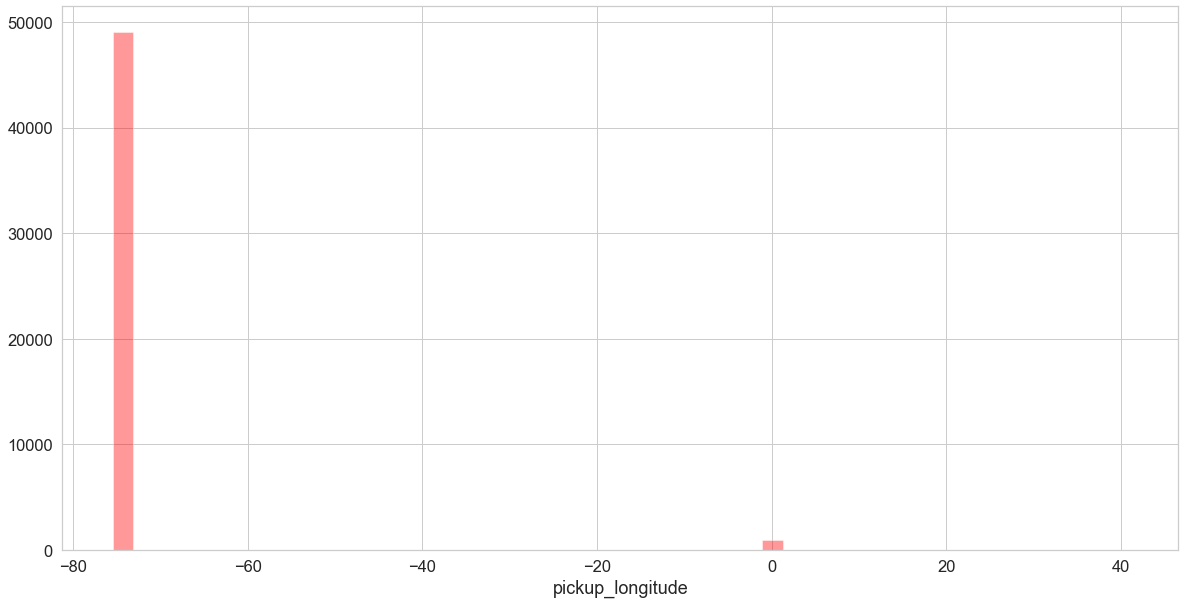

In [42]:
ax = sns.distplot(df['pickup_longitude'], kde = False, color = 'red')

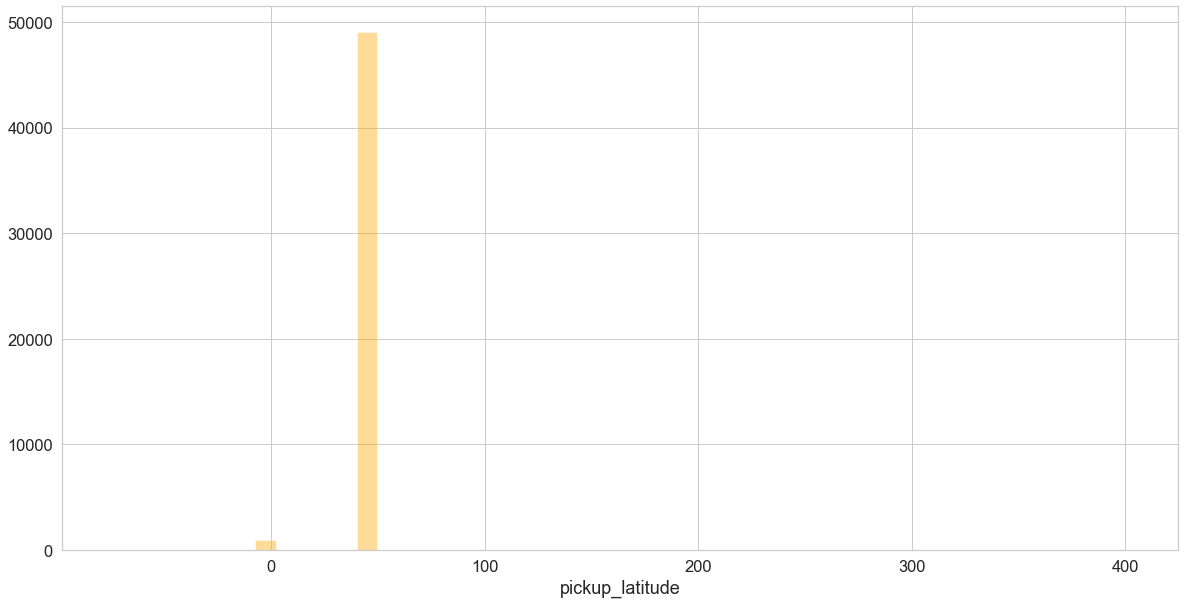

In [43]:
ax = sns.distplot(df['pickup_latitude'], kde = False, color = 'orange')

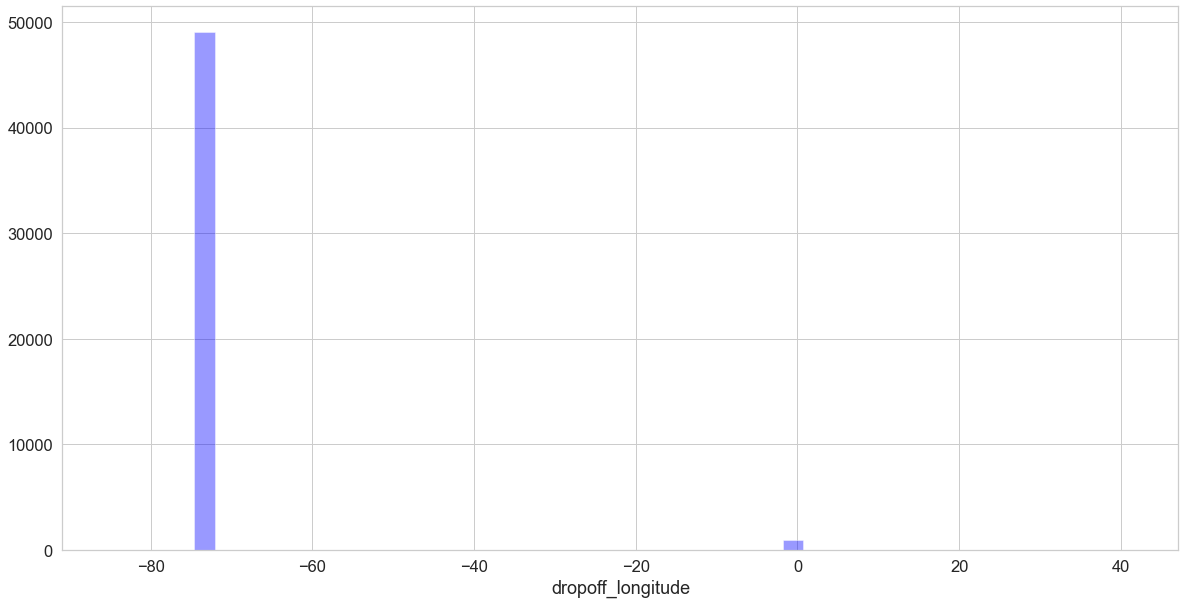

In [44]:
ax = sns.distplot(df['dropoff_longitude'], kde = False, color = 'blue')

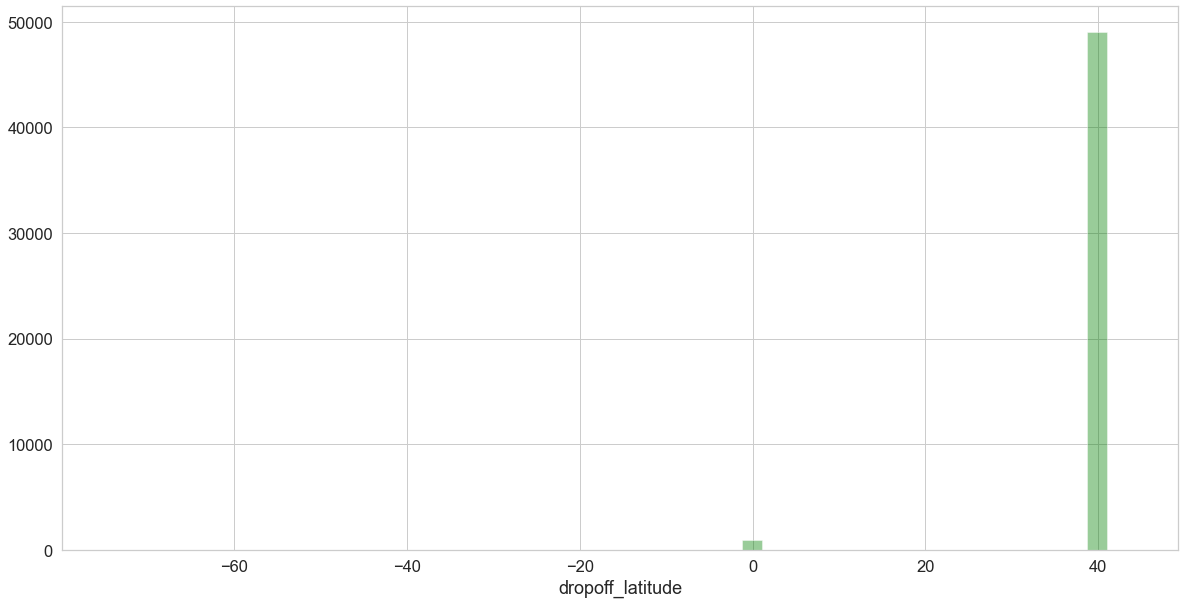

In [45]:
ax = sns.distplot(df['dropoff_latitude'], kde = False, color = 'green')

**Вывод:**
 - 10 < pickup_latitude < 120
 - pickup_longitude < -60
 - 10 < dropoff_latitude
 - dropoff_longitude < -60

**Критерии для фильтрации выбраны, остался последний шаг: отфильтровать имеющиеся данные и наконец-то найти самую дальнюю поездку.**

**Для фильтрации используйте условия из предыдущего степа, а также добавьте еще одно ограничение для переменной distance. Предположим, максимальная удаленность пунктов друг от друга не должна превышать 50 километров, иначе такой заказ не будет принят системой, а наличие подобных результатов в таблице будет считаться ошибкой.**

**В качестве ответа укажите сумму, которую заплатил пассажир, проехавший наибольшее расстояние.**

In [61]:
shaped_df = df.query('((10 < pickup_latitude < 120) and (pickup_longitude < -60) and (10 < dropoff_latitude) and (dropoff_longitude < -60)) and distance <=50')

In [62]:
shaped_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [63]:
shaped_df.loc[shaped_df.distance.idxmax()].fare_amount

136.0

In [64]:
shaped_df.query('distance == @shaped_df.distance.max()').fare_amount

# .query('...', inplace = True) - перезапись ДФ, по которому идет фильтрация query

33502    136.0
Name: fare_amount, dtype: float64